# Loading Datasets

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, make_scorer # maybe can remove
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
merged_data = pd.read_csv('data_with_FE.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36455 entries, 0 to 36454
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                36455 non-null  int64  
 1   owns_car              36455 non-null  int64  
 2   owns_property         36455 non-null  int64  
 3   n_children            36455 non-null  int64  
 4   annual_income         36455 non-null  float64
 5   income_type           36455 non-null  object 
 6   education_type        36455 non-null  object 
 7   marital_status        36455 non-null  object 
 8   housing_type          36455 non-null  object 
 9   has_work_phone        36455 non-null  int64  
 10  has_phone             36455 non-null  int64  
 11  has_email             36455 non-null  int64  
 12  occupation            36455 non-null  object 
 13  n_fam_members         36455 non-null  float64
 14  years_employed        36455 non-null  float64
 15  age                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
merged_data = pd.read_csv('/content/drive/MyDrive/data_with_FE.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36455 entries, 0 to 36454
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                36455 non-null  int64  
 1   owns_car              36455 non-null  int64  
 2   owns_property         36455 non-null  int64  
 3   n_children            36455 non-null  int64  
 4   annual_income         36455 non-null  float64
 5   income_type           36455 non-null  object 
 6   education_type        36455 non-null  object 
 7   marital_status        36455 non-null  object 
 8   housing_type          36455 non-null  object 
 9   has_work_phone        36455 non-null  int64  
 10  has_phone             36455 non-null  int64  
 11  has_email             36455 non-null  int64  
 12  occupation            36455 non-null  object 
 13  n_fam_members         36455 non-null  float64
 14  years_employed        36455 non-null  float64
 15  age                

In [ ]:
# check class imbalance: compare % of labels
merged_data['label'].value_counts()

# 99.5% (36284/36451) majority

,count
label,
1,36288
0,167


# Feature Selection (based on newly created variables)

Testing correlation between newly added features

In [ ]:
def correlation(data, new_variable, target_variable):
  correlation=data[new_variable].corr(data[target_variable])

  if abs(correlation)>=0.7:
    print(new_variable, target_variable, correlation, 'High correlation')
  else:
    print(new_variable, target_variable, correlation)
  return correlation

In [ ]:
# Feature 2: "employment_age_ratio"
print('Feature 2: "employment_age_ratio"')
correlation(merged_data,'employment_age_ratio','years_employed')
correlation(merged_data,'employment_age_ratio','age')

Feature 2: "employment_age_ratio"
employment_age_ratio years_employed 0.9592692796894579 High correlation
employment_age_ratio age -0.2169759128490058


-0.2169759128490058

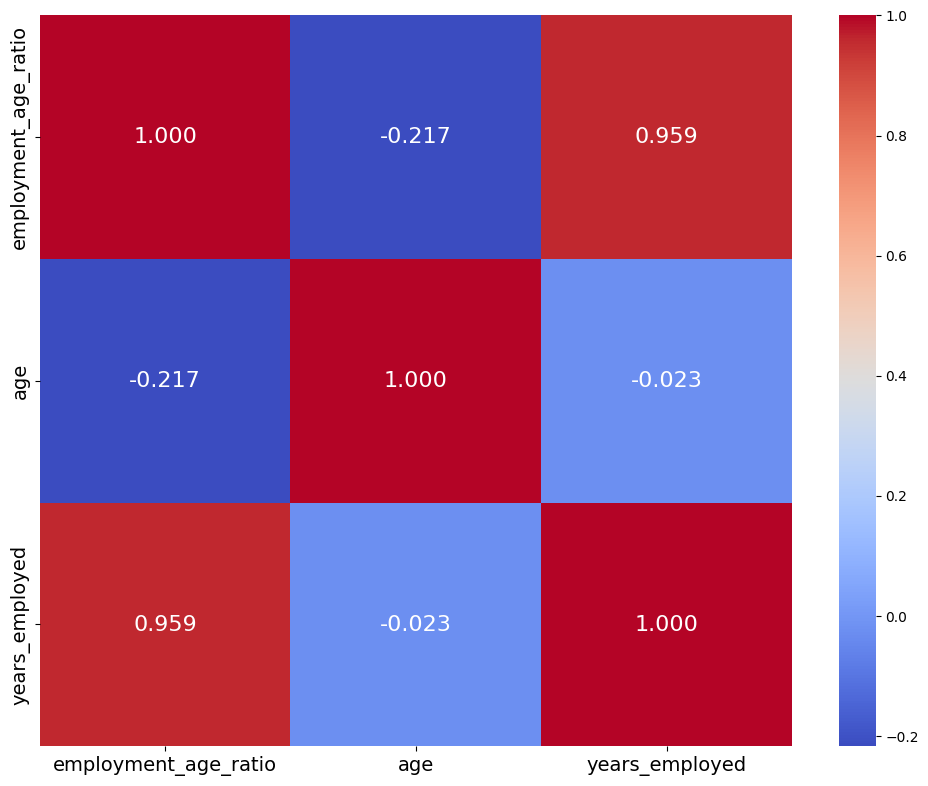

In [ ]:
df =  merged_data[['employment_age_ratio','age','years_employed']]

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 16}, fmt=".3f", cmap="coolwarm", cbar=True)

# Customize the plot
plt.title("", fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Feature 3: "single_parent"
print('Feature 3: "single_parent"')
df3=merged_data.copy()
# print(df3)

le = LabelEncoder()
#df3['single_parent'] = df3['single_parent'].map({'yes':1 , 'no': 0})
df3['marital_status'] = le.fit_transform(df3['marital_status'])
print(df3['single_parent'].value_counts())
#print(df3)
correlation(df3,'single_parent','marital_status')
correlation(df3,'single_parent','n_children')

Feature 3: "single_parent"
single_parent
0    35617
1      838
Name: count, dtype: int64
single_parent marital_status 0.28220276259367477
single_parent n_children 0.15571463130433355


0.15571463130433355

<ipython-input-12-9f91ab40bfd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital_status'] = LabelEncoder().fit_transform(df['marital_status'])


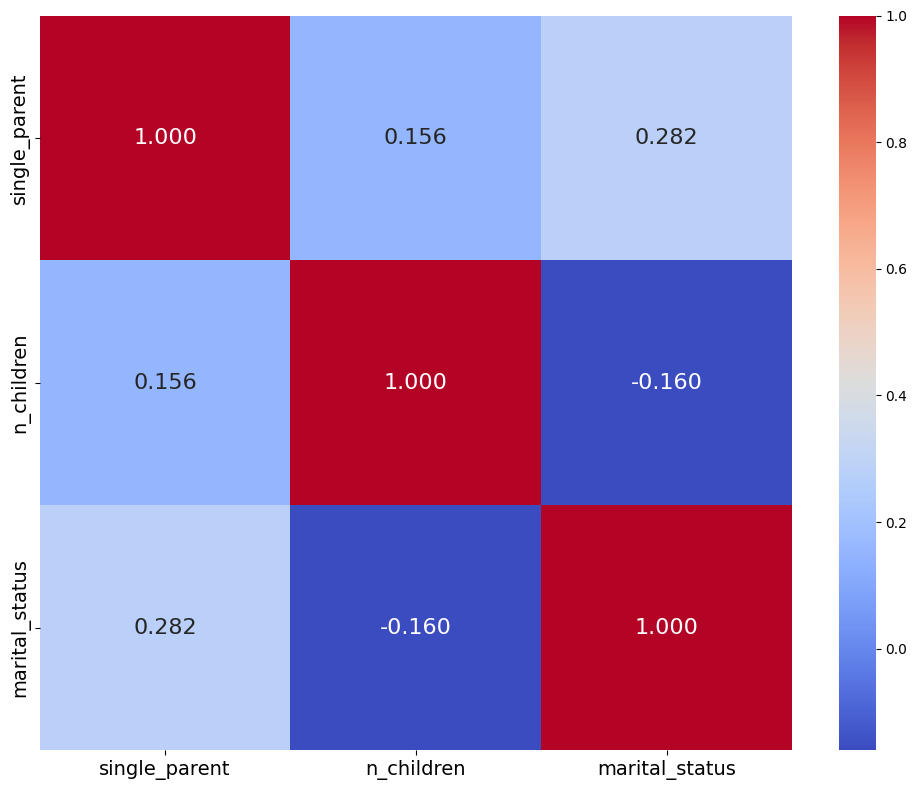

In [ ]:
df =  merged_data[['single_parent','n_children','marital_status']]
df['marital_status'] = LabelEncoder().fit_transform(df['marital_status'])

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", annot_kws={"size": 16}, cmap="coolwarm", cbar=True)

# Customize the plot
plt.title("", fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Feature 4: communication score
print('Feature 4: "communication_score"')

correlation(merged_data,'communication_score','has_work_phone')
correlation(merged_data,'communication_score','has_phone')
correlation(merged_data,'communication_score','has_email')

Feature 4: "communication_score"
communication_score has_work_phone 0.8674725592067405 High correlation
communication_score has_phone 0.7037935758396079 High correlation
communication_score has_email 0.17830366286401586


0.17830366286401586

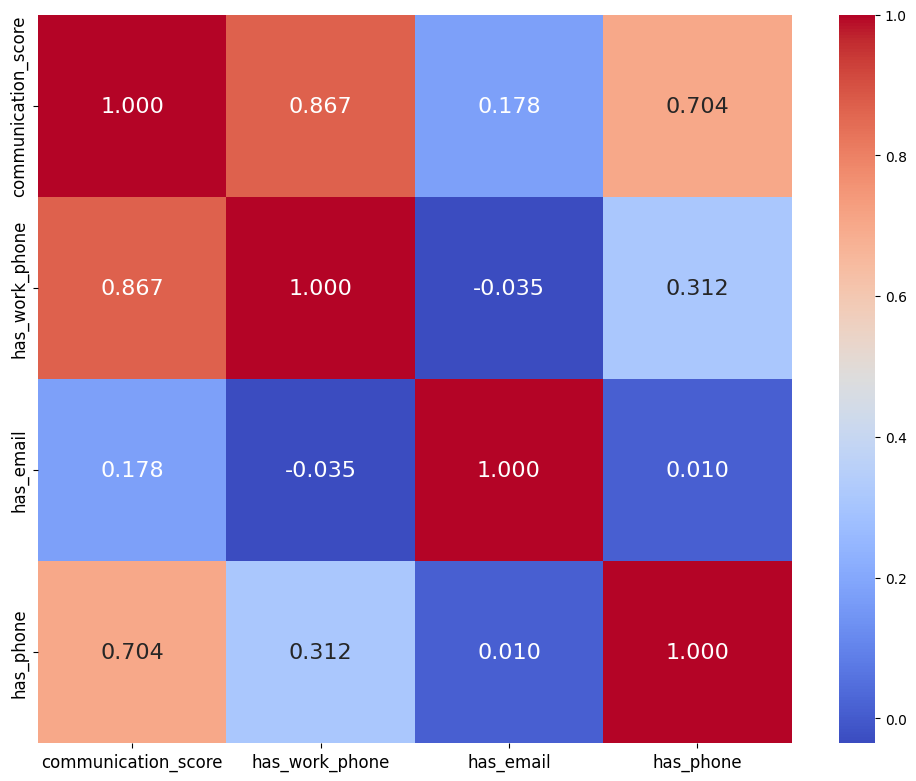

In [ ]:
df =  merged_data[['communication_score','has_work_phone','has_email','has_phone']]

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 16}, fmt=".3f", cmap="coolwarm", cbar=True)

# Customize the plot
plt.title("", fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, precision_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

# simple DT
def preprocess(data, target_variable=None):
    data_copy = data.copy()
    X = data_copy.drop(['label'], axis=1)
    # Separate features and target variable
    if target_variable is not None:
      X = X.drop([target_variable], axis=1)
    y = data_copy['label']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numeric and categorical features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    # print("Numeric Features:", numeric_features)
    # print("Categorical Features:", categorical_features)

    # Create preprocessing transformers
    numeric_transformer = RobustScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

    # Create column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Fit and transform the training data
    X_train_transformed = preprocessor.fit_transform(X_train)
    # Transform the test data using the same preprocessor
    X_test_transformed = preprocessor.transform(X_test)

    # Get feature names after transformation
    numeric_features_new = numeric_features.tolist()
    categorical_features_new = []
    for i, feature in enumerate(categorical_features):
        # Get the categories for each categorical feature (excluding the dropped one)
        categories = preprocessor.named_transformers_['cat'].categories_[i][1:]
        categorical_features_new.extend([f"{feature}_{cat}" for cat in categories])

    # Combine all feature names
    feature_names = numeric_features_new + categorical_features_new
    # print("Feature Names after Transformation:", feature_names)

    # Convert transformed arrays to DataFrames with proper column names
    X_train_transformed = pd.DataFrame(
        X_train_transformed,
        columns=feature_names,
        index=X_train.index
    )

    X_test_transformed = pd.DataFrame(
        X_test_transformed,
        columns=feature_names,
        index=X_test.index
    )
    return X_train_transformed, X_test_transformed, y_train, y_test

def evaluate(X_train_transformed, X_test_transformed, y_train, y_test):
    # Apply SMOTE to the training data
    ros = SMOTE(sampling_strategy='minority', random_state=42)
    # ros= RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

    # Train the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = clf.predict(X_test_transformed)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='binary')  # Assuming binary targets
    print(f"F1 Score: {f1}")

    # Calculate Precision
    precision = precision_score(y_test, y_pred, average='binary')
    print(f"Precision: {precision}")

    # Calculate AUC PRC
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    auc_prc = auc(recall, precision)
    print(f"AUC PRC: {auc_prc}")

    # Calculate matthews
    matthews = matthews_corrcoef(y_test, y_pred)
    print(f"Matthews's Correlation Coefficient: {matthews}")

    # Calculate Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

    return f1, precision, auc_prc, matthews, specificity

In [ ]:
# FOR TESTING

# X with target (old+new variables)
X_train_transformed, X_test_transformed, y_train, y_test=preprocess(merged_data)
# transformed_df=X_train_transformed.copy()
# transformed_df['label']=y_train

In [ ]:
# Feature 2: "employment_age_ratio"
print('Feature 2: "employment_age_ratio"')

## MODEL EVALUATION
# X with target
print('\nOriginal data (old+new variables)')
evaluate(X_train_transformed, X_test_transformed, y_train, y_test)
print("")

# X without target (original feature)
print('Original data (-old variable)')
print('years_employed')
evaluate(*preprocess(merged_data, 'years_employed'))
print("")

print('age')
evaluate(*preprocess(merged_data, 'age'))

Feature 2: "employment_age_ratio"

Original data (old+new variables)
F1 Score: 0.9964192260019281
Precision: 0.9965564738292011
AUC PRC: 0.9982708427617569
Matthews's Correlation Coefficient: 0.12982929873644342
Specificity: 0.13793103448275862

Original data (-old variable)
years_employed
F1 Score: 0.9966265060240964
Precision: 0.996557896186149
AUC PRC: 0.9982723755127689
Matthews's Correlation Coefficient: 0.13699967636360483
Specificity: 0.13793103448275862

age
F1 Score: 0.9956584659913169
Precision: 0.9965512484480618
AUC PRC: 0.9982652176385473
Matthews's Correlation Coefficient: 0.11036435726445933
Specificity: 0.13793103448275862


(0.9956584659913169,
 array([0.99602249, 0.99655125, 1.        ]),
 0.9982652176385473,
 0.11036435726445933,
 0.13793103448275862)

In [ ]:
# Feature 3: "single_parent"
print('Feature 3: "single_parent"')

# ## MODEL EVALUATION
# X with target
print('\nOriginal data (old+new variables)')
evaluate(X_train_transformed, X_test_transformed, y_train, y_test)
print("")

# X without target (original feature)
print('Original data (-old variable)')
print('marital_status')
evaluate(*preprocess(merged_data, 'marital_status'))
print("")
print('n_children')
evaluate(*preprocess(merged_data, 'n_children'))

Feature 3: "single_parent"

Original data (old+new variables)
F1 Score: 0.9964192260019281
Precision: 0.9965564738292011
AUC PRC: 0.9982708427617569
Matthews's Correlation Coefficient: 0.12982929873644342
Specificity: 0.13793103448275862

Original data (-old variable)
marital_status
F1 Score: 0.996488328857674
Precision: 0.996556948078777
AUC PRC: 0.9982713537440576
Matthews's Correlation Coefficient: 0.13210169260433366
Specificity: 0.13793103448275862

n_children
F1 Score: 0.9962815039250792
Precision: 0.9964187327823691
AUC PRC: 0.9982016983808282
Matthews's Correlation Coefficient: 0.0963396324676513
Specificity: 0.10344827586206896


(0.9962815039250792,
 array([0.99602249, 0.99641873, 1.        ]),
 0.9982016983808282,
 0.0963396324676513,
 0.10344827586206896)

In [ ]:
# Feature 4: communication score
print('Feature 4: "communication_score"')

## MODEL EVALUATION

# X with target
print('\nOriginal data (old+new variables)')
evaluate(X_train_transformed, X_test_transformed, y_train, y_test)
print("")

# X without target (original feature)
print('Original data (-old variable)')

print('has_work_phone')
evaluate(*preprocess(merged_data, 'has_work_phone'))
print("")
print('has_phone')
evaluate(*preprocess(merged_data, 'has_phone'))
print("")
print('has_email')
evaluate(*preprocess(merged_data, 'has_email'))

Feature 4: "communication_score"

Original data (old+new variables)
F1 Score: 0.9964192260019281
Precision: 0.9965564738292011
AUC PRC: 0.9982708427617569
Matthews's Correlation Coefficient: 0.12982929873644342
Specificity: 0.13793103448275862

Original data (-old variable)
has_work_phone
F1 Score: 0.9960735689191982
Precision: 0.9965541006202618
AUC PRC: 0.9982682868697236
Matthews's Correlation Coefficient: 0.11989973861896751
Specificity: 0.13793103448275862

has_phone
F1 Score: 0.9964888123924268
Precision: 0.996420212033595
AUC PRC: 0.9982032595789793
Matthews's Correlation Coefficient: 0.10176884113621196
Specificity: 0.10344827586206896

has_email
F1 Score: 0.996350113628538
Precision: 0.9965559994489599
AUC PRC: 0.9982703317141236
Matthews's Correlation Coefficient: 0.12766230002586607
Specificity: 0.13793103448275862


(0.996350113628538,
 array([0.99602249, 0.996556  , 1.        ]),
 0.9982703317141236,
 0.12766230002586607,
 0.13793103448275862)

# Dropping original variables

## Dropping `years_employed`, `has_work_phone`, `has_phone`

In [ ]:
new_merged_data=merged_data.drop(['years_employed', 'has_work_phone', 'has_phone'], axis=1)
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36455 entries, 0 to 36454
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                36455 non-null  int64  
 1   owns_car              36455 non-null  int64  
 2   owns_property         36455 non-null  int64  
 3   n_children            36455 non-null  int64  
 4   annual_income         36455 non-null  float64
 5   income_type           36455 non-null  object 
 6   education_type        36455 non-null  object 
 7   marital_status        36455 non-null  object 
 8   housing_type          36455 non-null  object 
 9   has_email             36455 non-null  int64  
 10  occupation            36455 non-null  object 
 11  n_fam_members         36455 non-null  float64
 12  age                   36455 non-null  float64
 13  label                 36455 non-null  int64  
 14  employment_age_ratio  36455 non-null  float64
 15  single_parent      

In [ ]:
evaluate(*preprocess(new_merged_data))

F1 Score: 0.9968337004405287
Precision: 0.996559317368566
AUC PRC: 0.9982739076765157
Matthews's Correlation Coefficient: 0.14540170491698037
Specificity: 0.13793103448275862


(0.9968337004405287,
 array([0.99602249, 0.99655932, 1.        ]),
 0.9982739076765157,
 0.14540170491698037,
 0.13793103448275862)

In [ ]:
new_merged_data.to_csv('credit_card_prediction_cleaned_3.csv', index=False)